In [1]:
#This file contains noun phrase and n-gram filters on Semeval dataset (XML version)

import glob, os
import utils, preprocessing, generate_candidate
import feature_extraction, generate_keyphrase

2018-08-27 17:22:41,638: DEBUG: CACHEDIR=C:\Users\user\.matplotlib
2018-08-27 17:22:41,670: DEBUG: Using fontManager instance from C:\Users\user\.matplotlib\fontList.json
2018-08-27 17:22:42,035: DEBUG: backend module://ipykernel.pylab.backend_inline version unknown
2018-08-27 17:22:42,128: DEBUG: backend module://ipykernel.pylab.backend_inline version unknown


In [ ]:
#only run one time, if pickles have been generated, please skip into next step

#load gold-standard keyphrase: combined, reader, author
#create training combined label
train_label_directory = open('./data/se_txt/train/train.combined.stem.final', 
                        encoding='utf-8').read()
train_label = preprocessing.extract_keyphrase(train_label_directory)
pickle_train_label = utils.create_pickle(train_label, './pickle/semeval/train label')

#create testing combined label
test_label_directory = open('./data/se_txt/test_answer/test.combined.stem.final', 
                            encoding='utf-8').read()
test_label = preprocessing.extract_keyphrase(test_label_directory)
pickle_test_label = utils.create_pickle(test_label, './pickle/semeval/test label')

#create training reader label
train_reader_label_directory = open('./data/se_txt/train/train.reader.stem.final', 
                                encoding='utf-8').read()
train_reader_label = preprocessing.extract_keyphrase(train_reader_label_directory)
pickle_train_reader_label = utils.create_pickle(train_reader_label, 
                                './pickle/semeval/train reader label')

#create testing reader label
test_reader_label_directory = open('./data/se_txt/test_answer/test.reader.stem.final', 
                                encoding='utf-8').read()
test_reader_label = preprocessing.extract_keyphrase(test_reader_label_directory)
pickle_test_reader_label = utils.create_pickle(test_reader_label, 
                                './pickle/semeval/test reader label')

#create training author label
train_author_label_directory = open('./data/se_txt/train/train.author.stem.final', 
                                encoding='utf-8').read()
train_author_label = preprocessing.extract_keyphrase(train_author_label_directory)
pickle_train_author_label = utils.create_pickle(train_author_label, 
                                './pickle/semeval/train author label')

#create testing author label
test_author_label_directory = open('./data/se_txt/test_answer/test.author.stem.final', 
                                encoding='utf-8').read()
test_author_label = preprocessing.extract_keyphrase(test_author_label_directory)
pickle_test_author_label = utils.create_pickle(test_author_label, 
                                './pickle/semeval/test author label')

In [ ]:
#only run one time, if pickles have been generated, please skip into next step

#load and create training data
train_directory = glob.glob('./data/se_xml/train/*.xml')
train_raw = preprocessing.load_xml(train_directory)
pickle_train_raw = utils.create_pickle(train_raw,'./pickle/semeval/xml train raw')
train_data = preprocessing.create_xml_corpus(train_raw)
pickle_train_data = utils.create_pickle(train_data,'./pickle/semeval/xml train data')
train_tf_corpus = feature_extraction.calculate_tf(train_data, vocab = None, type = 'ngram')
pickle_train_tf_corpus = utils.create_pickle(train_tf_corpus,'./pickle/semeval/xml train tf corpus')

#load and create testing data
test_directory = glob.glob('./data/se_xml/test/*.xml')
test_raw = preprocessing.load_xml(test_directory)
pickle_test_raw = utils.create_pickle(test_raw,
                                      './pickle/semeval/xml test raw')
test_data = preprocessing.create_xml_corpus(test_raw)
pickle_test_data = utils.create_pickle(test_data,
                                       './pickle/semeval/xml test data')
test_tf_corpus = feature_extraction.calculate_tf(test_data, vocab = None, type = 'ngram')
pickle_test_tf_corpus = utils.create_pickle(test_tf_corpus,
                                            './pickle/semeval/xml test tf corpus')


#create candidates based on n-gram and store into pickle of training data
print("Generating n-gram candidates..")
ngram_candidates = generate_candidate.calculate_tfidf(train_data, vocab=None, type='ngram') 
pickle_ngram_candidates = utils.create_pickle(ngram_candidates, 
                            './pickle/semeval/xml ngram candidates')

#create candidates based on n-gram and store into pickle of testing data
test_ngram_candidates = generate_candidate.calculate_tfidf(test_data, vocab=None, type='ngram') 
pickle_test_ngram_candidates = utils.create_pickle(test_ngram_candidates, 
                            './pickle/semeval/xml test ngram candidates')


#create candidates based on noun phrase and store into pickle of training data
print("Generating noun phrase candidates..")
nounphrase_vocabulary = generate_candidate.create_phrase_vocabulary(train_data)
train_tf_nounphrase_corpus = feature_extraction.calculate_tf(train_data, 
                            vocab = nounphrase_vocabulary, type = 'np')
pickle_train_tf_nounphrase_corpus = utils.create_pickle(train_tf_nounphrase_corpus,
                            './pickle/semeval/xml train tf nounphrase corpus')
nounphrase_candidates = generate_candidate.calculate_tfidf(train_data, 
                            nounphrase_vocabulary, type='np')
pickle_nounphrase_candidates = utils.create_pickle(nounphrase_candidates, 
                            './pickle/semeval/xml nounphrase candidates')

#create candidates based on noun phrase and store into pickle of testing data
test_nounphrase_vocabulary = generate_candidate.create_phrase_vocabulary(test_data)
test_tf_nounphrase_corpus = feature_extraction.calculate_tf(test_data, 
                            vocab = test_nounphrase_vocabulary, type = 'np')
pickle_test_tf_nounphrase_corpus = utils.create_pickle(test_tf_nounphrase_corpus,
                            './pickle/semeval/xml test tf nounphrase corpus')
test_nounphrase_candidates = generate_candidate.calculate_tfidf(test_data, 
                            test_nounphrase_vocabulary, type='np')
pickle_test_nounphrase_candidates = utils.create_pickle(test_nounphrase_candidates, 
                            './pickle/semeval/xml test nounphrase candidates')


#create dictionary for supervised keyphraseness
#create a dictionary supervised keyphraseness on ngram filter by combined label
supervised_key = feature_extraction.create_supervised_list(train_label, train_tf_corpus)
supervised_corpus = utils.create_pickle(supervised_key, './pickle/semeval/xml ngram supervised keyphraseness')

#create a dictionary supervised keyphraseness on noun phrase filter by combined label
np_supervised_key = feature_extraction.create_supervised_list(train_label, train_tf_nounphrase_corpus)
np_supervised_corpus = utils.create_pickle(np_supervised_key, './pickle/semeval/xml np supervised keyphraseness')

#create a dictionary supervised keyphraseness on ngram filter by reader label
reader_supervised_key = feature_extraction.create_supervised_list(train_reader_label, train_tf_corpus)
reader_supervised_corpus = utils.create_pickle(reader_supervised_key, 
                                               './pickle/semeval/reader xml ngram supervised keyphraseness')

#create a dictionary supervised keyphraseness on noun phrase filter by reader label
reader_np_supervised_key = feature_extraction.create_supervised_list(train_reader_label, train_tf_nounphrase_corpus)
reader_np_supervised_corpus = utils.create_pickle(reader_np_supervised_key, 
                                                  './pickle/semeval/reader xml np supervised keyphraseness')

#create a dictionary supervised keyphraseness on ngram filter by author label
author_supervised_key = feature_extraction.create_supervised_list(train_author_label, train_tf_corpus)
author_supervised_corpus = utils.create_pickle(author_supervised_key, 
                                               './pickle/semeval/author xml ngram supervised keyphraseness')

#create a dictionary supervised keyphraseness on noun phrase filter by author label
author_np_supervised_key = feature_extraction.create_supervised_list(train_author_label, train_tf_nounphrase_corpus)
author_np_supervised_corpus = utils.create_pickle(author_np_supervised_key, 
                                                  './pickle/semeval/author xml np supervised keyphraseness')

In [2]:
#open all relevant pickles

print("Opening all pickles")
train_raw = utils.open_pickle('./pickle/semeval/xml train raw')
train_data = utils.open_pickle('./pickle/semeval/xml train data')

train_label = utils.open_pickle('./pickle/semeval/train label')
train_reader_label = utils.open_pickle('./pickle/semeval/train reader label')
train_author_label = utils.open_pickle('./pickle/semeval/train author label')

train_tf_corpus = utils.open_pickle('./pickle/semeval/xml train tf corpus')
train_tf_nounphrase_corpus = utils.open_pickle('./pickle/semeval/xml train tf nounphrase corpus')

test_raw = utils.open_pickle('./pickle/semeval/xml test raw')
test_data = utils.open_pickle('./pickle/semeval/xml test data')

test_label = utils.open_pickle('./pickle/semeval/test label')
test_reader_label = utils.open_pickle('./pickle/semeval/test reader label')
test_author_label = utils.open_pickle('./pickle/semeval/test author label')

test_tf_corpus = utils.open_pickle('./pickle/semeval/xml test tf corpus')
test_tf_nounphrase_corpus = utils.open_pickle('./pickle/semeval/xml test tf nounphrase corpus')

train_topics = utils.open_pickle('./pickle/semeval/xml train topics')
test_topics = utils.open_pickle('./pickle/semeval/xml test topics')

ngram_candidates = utils.open_pickle('./pickle/semeval/xml ngram candidates')
test_ngram_candidates = utils.open_pickle('./pickle/semeval/xml test ngram candidates')

nounphrase_candidates = utils.open_pickle('./pickle/semeval/xml nounphrase candidates')
test_nounphrase_candidates = utils.open_pickle('./pickle/semeval/xml test nounphrase candidates')

#load supervised key
supervised_key = utils.open_pickle('./pickle/semeval/xml ngram supervised keyphraseness')
np_supervised_key = utils.open_pickle('./pickle/semeval/xml np supervised keyphraseness')

reader_supervised_key = utils.open_pickle('./pickle/semeval/reader xml ngram supervised keyphraseness')
reader_np_supervised_key = utils.open_pickle('./pickle/semeval/reader xml np supervised keyphraseness')

author_supervised_key = utils.open_pickle('./pickle/semeval/author xml ngram supervised keyphraseness')
author_np_supervised_key = utils.open_pickle('./pickle/semeval/author xml np supervised keyphraseness')


Opening all pickles


In [3]:
#evaluation on combined label (default = 15)

number_keyphrase1 = 5
number_keyphrase2 = 10
number_keyphrase3 = 15

#create examples on training and testing data
#uncomment if the pickles are not available
'''
#create examples on training and testing data
print("Creating examples of n-gram on combined label..")
ngram_train = feature_extraction.create_features(train_data, 
                ngram_candidates, train_label, supervised_key, train_tf_corpus, 
                train_topics, name='./csv/semeval/xml_train_ngram', 
                n_keyphrase = number_keyphrase3)
                
ngram_test = feature_extraction.create_features(test_data, 
                test_ngram_candidates, test_label, supervised_key, test_tf_corpus, 
                test_topics, name='./csv/semeval/xml_test_ngram',
                n_keyphrase = number_keyphrase3)

print("Creating examples of noun phrase on combined label..")
nounphrase_train = feature_extraction.create_features(train_data,
                nounphrase_candidates, train_label, np_supervised_key, train_tf_nounphrase_corpus, 
                train_topics, name='./csv/semeval/xml_train_nounphrase', 
                n_keyphrase = number_keyphrase3) 

nounphrase_test = feature_extraction.create_features(test_data, 
                test_nounphrase_candidates, test_label, np_supervised_key, test_tf_nounphrase_corpus, 
                test_topics, name='./csv/semeval/xml_test_nounphrase', 
                n_keyphrase = number_keyphrase3)
'''

#evaluation - dont have
'''
print('Evaluation on combined label - ngram:')
ngram_prediction1 = generate_keyphrase.predict_data(test_ngram_candidates, 
                test_label, train_data='./csv/semeval/xml_train_ngram', 
                test_data='./csv/semeval/xml_test_ngram', 
                n_keyphrase = number_keyphrase1)
print('Precision, recall, f-measure on top 5 candidates', ngram_prediction1)

ngram_prediction2 = generate_keyphrase.predict_data(test_ngram_candidates, 
                test_label, train_data='./csv/semeval/xml_train_ngram', 
                test_data='./csv/semeval/xml_test_ngram', 
                n_keyphrase = number_keyphrase2)
print('Precision, recall, f-measure on top 10 candidates', ngram_prediction2)

ngram_prediction3 = generate_keyphrase.predict_data(test_ngram_candidates, 
                test_label, train_data='./csv/semeval/xml_train_ngram', 
                test_data='./csv/semeval/xml_test_ngram', 
                n_keyphrase = number_keyphrase3)
print('Precision, recall, f-measure on top 15 candidates', ngram_prediction3)
'''

#evaluation
print('Evaluation on combined label - nounphrase')
np_prediction1 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_label, train_data='./csv/semeval/xml_train_nounphrase', 
                test_data='./csv/semeval/xml_test_nounphrase', 
                n_keyphrase = number_keyphrase1)
print('Precision, recall, f-measure on top 5 candidates', np_prediction1)

np_prediction2 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_label, train_data='./csv/semeval/xml_train_nounphrase', 
                test_data='./csv/semeval/xml_test_nounphrase', 
                n_keyphrase = number_keyphrase2)
print('Precision, recall, f-measure on top 10 candidates', np_prediction2)

np_prediction3 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_label, train_data='./csv/semeval/xml_train_nounphrase', 
                test_data='./csv/semeval/xml_test_nounphrase', 
                n_keyphrase = number_keyphrase3)
print('Precision, recall, f-measure on top 15 candidates', np_prediction3)

#generate the result of prediction into excel
ngram_prediction_keyphrase = generate_keyphrase.get_predicted_keyphrases(test_ngram_candidates,
                    train_data='./csv/semeval/xml_train_ngram', 
                    test_data='./csv/semeval/xml_test_ngram', 
                    csv_name='./csv/semeval/xml predicted ngram keyphrases 15 keywords', 
                    n_keyphrase = number_keyphrase3)

np_prediction_keyphrase = generate_keyphrase.get_predicted_keyphrases(test_nounphrase_candidates,
                    train_data='./csv/semeval/xml_train_nounphrase', 
                    test_data='./csv/semeval/xml_test_nounphrase', 
                    csv_name='./csv/semeval/xml predicted np keyphrases 15 keywords', 
                    n_keyphrase = number_keyphrase3)

Evaluation on combined label - nounphrase
Fmeasure on full features:
Precision, recall, f-measure on top 5 candidates [('LR', (29.4, 9.72, 14.61))]
Fmeasure on full features:
Precision, recall, f-measure on top 10 candidates [('LR', (24.0, 15.87, 19.11))]
Fmeasure on full features:
Precision, recall, f-measure on top 15 candidates [('LR', (20.4, 20.24, 20.32))]


In [4]:
#evaluation MODEL into reader label (default = 10 keyphrases)

reader_number_keyphrase1 = 5
reader_number_keyphrase2 = 10
reader_number_keyphrase3 = 15


#create examples on training and testing data
'''
print("Creating examples of noun phrase on combined label..")
reader_nounphrase_train = feature_extraction.create_features(train_data,
                nounphrase_candidates, train_reader_label, reader_np_supervised_key, train_tf_nounphrase_corpus, 
                train_topics, name='./csv/semeval/2reader_xml_train_nounphrase', 
                n_keyphrase = reader_number_keyphrase2) 

reader_nounphrase_test = feature_extraction.create_features(test_data, 
                test_nounphrase_candidates, test_reader_label, reader_np_supervised_key, test_tf_nounphrase_corpus, 
                test_topics, name='./csv/semeval/2reader_xml_test_nounphrase', 
                n_keyphrase = reader_number_keyphrase2)
'''

#evaluation
print('Evaluation on reader label - nounphrase:')
reader_np_prediction1 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_reader_label, train_data='./csv/semeval/reader_xml_train_nounphrase', 
                test_data='./csv/semeval/reader_xml_test_nounphrase', 
                n_keyphrase = reader_number_keyphrase1)
print('Precision, recall, f-measure on top 5 candidates', reader_np_prediction1)

reader_np_prediction2 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_reader_label, train_data='./csv/semeval/reader_xml_train_nounphrase', 
                test_data='./csv/semeval/reader_xml_test_nounphrase', 
                n_keyphrase = reader_number_keyphrase2)
print('Precision, recall, f-measure on top 10 candidates', reader_np_prediction2)

reader_np_prediction3 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_reader_label, train_data='./csv/semeval/reader_xml_train_nounphrase', 
                test_data='./csv/semeval/reader_xml_test_nounphrase', 
                n_keyphrase = reader_number_keyphrase3)
print('Precision, recall, f-measure on top 15 candidates', reader_np_prediction3)


#generate the result of prediction into excel
reader_np_prediction_keyphrase = generate_keyphrase.get_predicted_keyphrases(test_nounphrase_candidates,
                    train_data='./csv/semeval/reader_xml_train_nounphrase', 
                    test_data='./csv/semeval/reader_xml_test_nounphrase', 
                    csv_name='./csv/semeval/reader xml predicted np keyphrases 10 keywords', 
                    n_keyphrase = reader_number_keyphrase2)

Evaluation on reader label - nounphrase:
Fmeasure on full features:
Precision, recall, f-measure on top 5 candidates [('LR', (22.0, 8.82, 12.59))]
Fmeasure on full features:
Precision, recall, f-measure on top 10 candidates [('LR', (18.2, 14.6, 16.2))]
Fmeasure on full features:
Precision, recall, f-measure on top 15 candidates [('LR', (16.0, 19.25, 17.48))]


In [5]:
#evaluation MODEL into author label (5 keyphrases)
author_number_keyphrase1 = 5
author_number_keyphrase2 = 10
author_number_keyphrase3 = 15


#create examples on training and testing data
'''
print("Creating examples of noun phrase on author label..")
author_nounphrase_train = feature_extraction.create_features(train_data,
                nounphrase_candidates, train_author_label, author_np_supervised_key, train_tf_nounphrase_corpus, 
                train_topics, name='./csv/semeval/2author_xml_train_nounphrase', 
                n_keyphrase = author_number_keyphrase1) 

author_nounphrase_test = feature_extraction.create_features(test_data, 
                test_nounphrase_candidates, test_author_label, author_np_supervised_key, test_tf_nounphrase_corpus, 
                test_topics, name='./csv/semeval/2author_xml_test_nounphrase', 
                n_keyphrase = author_number_keyphrase1)
'''                

#evaluation
print('Evaluation on reader label - nounphrase:')
author_np_prediction1 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_author_label, train_data='./csv/semeval/author_xml_train_nounphrase', 
                test_data='./csv/semeval/author_xml_test_nounphrase', 
                n_keyphrase = author_number_keyphrase1)
print('Precision, recall, f-measure on top 5 candidates', author_np_prediction1)

author_np_prediction2 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_author_label, train_data='./csv/semeval/author_xml_train_nounphrase', 
                test_data='./csv/semeval/author_xml_test_nounphrase', 
                n_keyphrase = author_number_keyphrase2)
print('Precision, recall, f-measure on top 10 candidates', author_np_prediction2)


author_np_prediction3 = generate_keyphrase.predict_data(test_nounphrase_candidates, 
                test_author_label, train_data='./csv/semeval/author_xml_train_nounphrase', 
                test_data='./csv/semeval/author_xml_test_nounphrase', 
                n_keyphrase = author_number_keyphrase3)
print('Precision, recall, f-measure on top 15 candidates', author_np_prediction3)


#generate the result of prediction into excel
author_np_prediction_keyphrase = generate_keyphrase.get_predicted_keyphrases(test_nounphrase_candidates,
                    train_data='./csv/semeval/author_xml_train_nounphrase', 
                    test_data='./csv/semeval/author_xml_test_nounphrase', 
                    csv_name='./csv/semeval/author xml predicted np keyphrases 5 keywords', 
                    n_keyphrase = author_number_keyphrase1)

Evaluation on reader label - nounphrase:
Fmeasure on full features:
Precision, recall, f-measure on top 5 candidates [('LR', (13.2, 16.92, 14.83))]
Fmeasure on full features:
Precision, recall, f-measure on top 10 candidates [('LR', (10.1, 25.9, 14.53))]
Fmeasure on full features:
Precision, recall, f-measure on top 15 candidates [('LR', (8.07, 31.03, 12.81))]


2018-08-27 17:26:02,018: DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\user\\AppData\\Roaming\\Python\\Python35\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000
2018-08-27 17:26:02,113: DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\user\\AppData\\Roaming\\Python\\Python35\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


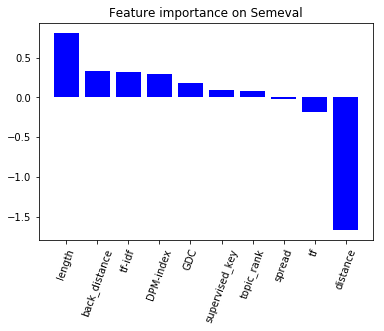

Feature importance on noun phrase filter: None


In [6]:
#calculate feature importance
weight = generate_keyphrase.feature_importance(train_data = './csv/semeval/xml_train_nounphrase_data.csv',
                                            test_data = './csv/semeval/xml_test_nounphrase_data.csv',
                                            name = 'Semeval')
print('Feature importance on noun phrase filter:', weight)